<a href="https://colab.research.google.com/github/baotodale06/AI-City-2025/blob/main/RF_DETR_CPP_TRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RF_DETR TensorRT Inference Using CPP And CUDA**

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
!nvidia-smi

Thu Apr  3 22:11:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Setting up CUDA**

In [ ]:
!apt-get update -y
!apt-get install -y cuda-12-4

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,688 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [ ]:
!ls /usr/local/ | grep cuda

cuda
cuda-12
cuda-12.4
cuda-12.5


In [ ]:
!sudo rm -rf /usr/local/cuda
!sudo ln -s /usr/local/cuda-12.4 /usr/local/cuda

In [ ]:
!export PATH=/usr/local/cuda-12.4/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-12.4/lib64:$LD_LIBRARY_PATH

In [ ]:
!echo $PATH
!echo $LD_LIBRARY_PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/usr/lib64-nvidia


In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Thu Apr  3 22:20:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8      

# **Install nvcc4jupyter To run CPP CUDA code in Google Colab**

In [ ]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmpnvmllv_r".


# **Install, set up, and test OpenCV**



In [ ]:
!apt install libopencv-dev
!apt install -y apt-file

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapt-pkg-perl libexporter-tiny-perl liblist-moreutils-perl liblist-moreutils-xs-perl
  libregexp-assemble-perl
The following NEW packages will be installed:
  apt-file libapt-pkg-perl libexporter-tiny-perl liblist-moreutils-perl liblist-moreutils-xs-perl
  libregexp-assemble-perl
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 293 kB of archives.
After this operation, 887 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libapt-pkg-perl amd64 0.1.40build2 [72.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libexport

In [ ]:
!dpkg -l | grep opencv

ii  libopencv-calib3d-dev:amd64            4.5.4+dfsg-9ubuntu4+jammy0              amd64        development files for libopencv-calib3d4.5d
ii  libopencv-calib3d4.5d:amd64            4.5.4+dfsg-9ubuntu4+jammy0              amd64        computer vision Camera Calibration library
ii  libopencv-contrib-dev:amd64            4.5.4+dfsg-9ubuntu4+jammy0              amd64        development files for libopencv-contrib4.5d
ii  libopencv-contrib4.5d:amd64            4.5.4+dfsg-9ubuntu4+jammy0              amd64        computer vision contrlib library
ii  libopencv-core-dev:amd64               4.5.4+dfsg-9ubuntu4+jammy0              amd64        development files for libopencv-core4.5d
ii  libopencv-core4.5d:amd64               4.5.4+dfsg-9ubuntu4+jammy0              amd64        computer vision core library
ii  libopencv-dev                          4.5.4+dfsg-9ubuntu4+jammy0              amd64        development files for opencv
ii  libopencv-dnn-dev:amd64                4.5.4+dfsg-9ubuntu4+ja

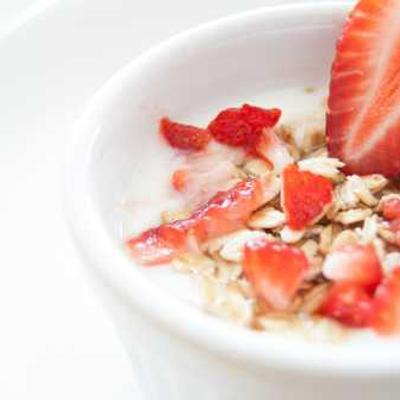

In [ ]:
import os
import subprocess
from IPython.display import Image

IMG_SIZE = 400
os.environ["IMG_SIZE"] = str(IMG_SIZE)
IMG_FNAME = "image.jpg"
os.environ["IMG_FNAME"] = IMG_FNAME

!wget -O $IMG_FNAME https://picsum.photos/$IMG_SIZE.jpg &> /dev/null
Image(filename=IMG_FNAME)

In [ ]:
OPEN_CV_COMPILER_ARGS = subprocess.check_output(["pkg-config", "--cflags", "--libs", "opencv4"]).decode().strip()

print(OPEN_CV_COMPILER_ARGS)

-I/usr/include/opencv4 -lopencv_stitching -lopencv_alphamat -lopencv_aruco -lopencv_barcode -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_dnn_objdetect -lopencv_dnn_superres -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_hfs -lopencv_img_hash -lopencv_intensity_transform -lopencv_line_descriptor -lopencv_mcc -lopencv_quality -lopencv_rapid -lopencv_reg -lopencv_rgbd -lopencv_saliency -lopencv_shape -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_superres -lopencv_optflow -lopencv_surface_matching -lopencv_tracking -lopencv_highgui -lopencv_datasets -lopencv_text -lopencv_plot -lopencv_ml -lopencv_videostab -lopencv_videoio -lopencv_viz -lopencv_wechat_qrcode -lopencv_ximgproc -lopencv_video -lopencv_xobjdetect -lopencv_objdetect -lopencv_calib3d -lopencv_imgcodecs -lopencv_features2d -lopencv_dnn -lopencv_flann -lopencv_xphoto -lopencv_photo -lopencv_imgproc -lopencv_core


In [ ]:
!apt-file update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy amd64 Contents (deb) [46.9 MB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security amd64 Contents (deb) [180 MB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy amd64 Contents (deb) [1,314 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https://r2u.stat.illinois.edu/ubuntu 

In [ ]:
%%cuda --compiler-args "$OPEN_CV_COMPILER_ARGS"

#include <opencv2/core.hpp>
#include <opencv2/imgcodecs.hpp>

#include <iostream>

#include <cuda_runtime.h>
#include <cstdio>

#define BLUR_SIZE 5
#define R 0
#define G 1
#define B 2

// error checking macro
#define cudaCheckErrors(msg) \
    do { \
        cudaError_t __err = cudaGetLastError(); \
        if (__err != cudaSuccess) { \
            fprintf(stderr, "Fatal error: %s (%s at %s:%d)\n", \
                msg, cudaGetErrorString(__err), \
                __FILE__, __LINE__); \
            fprintf(stderr, "*** FAILED - ABORTING\n"); \
            exit(1); \
        } \
    } while (0)

// kernel taken from https://stackoverflow.com/a/65973288
__global__ void blurKernel(
    unsigned char* in,
    unsigned char* out,
    int width,
    int height,
    int num_channel,
    int channel
) {

    int col = blockIdx.x * blockDim.x + threadIdx.x;
    int row = blockIdx.y * blockDim.y + threadIdx.y;

    if(col < width && row < height) {
        int pixVal = 0;
        int pixels = 0;
        for(int blurRow = -BLUR_SIZE; blurRow < BLUR_SIZE + 1; ++blurRow) {
            for(int blurCol = -BLUR_SIZE; blurCol < BLUR_SIZE + 1; ++blurCol) {
                int curRow = row + blurRow;
                int curCol = col + blurCol;
                if(curRow > -1 && curRow < height && curCol > -1 && curCol < width) {
                    pixVal += in[curRow * width * num_channel + curCol * num_channel + channel];
                    pixels++;
                }
            }
        }
        out[row * width * num_channel + col * num_channel + channel] = (unsigned char)(pixVal/pixels);
    }
}

int main(){
    std::string image_path = cv::samples::findFile("image.jpg");
    cv::Mat img = imread(image_path, cv::IMREAD_COLOR);
    if(img.empty())
    {
        std::cerr << "Could not read the image: " << image_path << std::endl;
        return 1;
    }

    // image shape
    int width = img.cols;
    int height = img.rows;
    int n_channels = 3; // hard-coded RGB processing

    // we will read and write directly into the data array of the OpenCV Matrix
    unsigned char *host_image_input = img.data;
    unsigned char *host_image_output = img.data;

    // allocate memory for device arrays
    unsigned char* dev_image_input = NULL;
    unsigned char* dev_image_output = NULL;
    cudaMalloc(
        (void**)&dev_image_input,
        sizeof(unsigned char) * height * width * n_channels
    );
    cudaMalloc(
        (void**)&dev_image_output,
        sizeof(unsigned char) * height * width * n_channels
    );
    cudaCheckErrors("cudaMalloc failure");

    // transfer data from host to device for processing on GPU
    cudaMemcpy(
        dev_image_input,
        host_image_input,
        sizeof(unsigned char) * height * width * n_channels,
        cudaMemcpyHostToDevice
    );
    cudaCheckErrors("cudaMemcpy H2D failure");

    // run a blur kernel on each channel
    dim3 blockSize(16, 16, 1);
    dim3 gridSize(width/blockSize.x, height/blockSize.y, 1);
    blurKernel<<<gridSize, blockSize>>>(dev_image_input, dev_image_output, width, height, n_channels, R);
    blurKernel<<<gridSize, blockSize>>>(dev_image_input, dev_image_output, width, height, n_channels, G);
    blurKernel<<<gridSize, blockSize>>>(dev_image_input, dev_image_output, width, height, n_channels, B);

    cudaDeviceSynchronize();
    cudaCheckErrors("kernel failure");

    // copy results back to host
    cudaMemcpy(
        host_image_output,
        dev_image_output,
        sizeof(unsigned char) * height * width * n_channels,
        cudaMemcpyDeviceToHost
    );
    cudaCheckErrors("cudaMemcpy D2H failure");

    cudaFree(dev_image_input);
    cudaFree(dev_image_output);

    // save the blurred image to disk
    cv::imwrite("image_blurred.jpg", img);
    return 0;
}

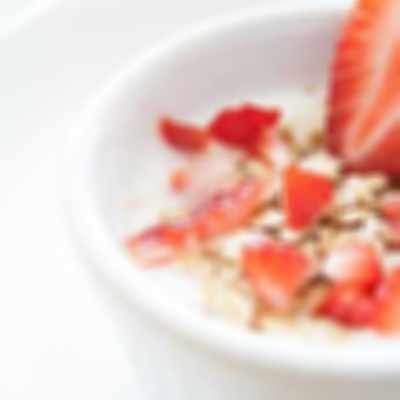

In [ ]:
Image(filename="image_blurred.jpg")

# **Install, set up, and test TensorRT**



In [ ]:
!sudo apt-get update
!sudo apt-get install -y tensorrt libnvinfer-dev libnvinfer-plugin-dev

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!dpkg -l | grep tensorrt

ii  tensorrt                               10.9.0.34-1+cuda12.8                    amd64        Meta package for TensorRT


In [ ]:
!find /usr/ -name '*libnvinfer.so*'
!find /usr/ -name 'NvInfer.h'

/usr/lib/x86_64-linux-gnu/libnvinfer.so
/usr/lib/x86_64-linux-gnu/libnvinfer.so.10
/usr/lib/x86_64-linux-gnu/libnvinfer.so.10.9.0
/usr/include/x86_64-linux-gnu/NvInfer.h


In [ ]:
!ls /usr/lib/x86_64-linux-gnu/libnvinfer.so
!ls /usr/lib/x86_64-linux-gnu/libnvinfer_plugin.so

/usr/lib/x86_64-linux-gnu/libnvinfer.so
/usr/lib/x86_64-linux-gnu/libnvinfer_plugin.so


In [ ]:
# Define compiler arguments for TensorRT
TENSORRT_COMPILER_ARGS = (
    "-I/usr/include/x86_64-linux-gnu "  # Path to TensorRT include files
    "-L/usr/lib/x86_64-linux-gnu "      # Path to TensorRT libraries
    "-lnvinfer "                         # Link against the TensorRT library
    "-lnvinfer_plugin "                  # Link against the TensorRT plugin library
    "-lnvonnxparser "                   # Link against the ONNX parser library
    "-lcublas "                         # Link against cuBLAS
    "-lcudart "                         # Link against cuDART
    "-lcudnn "                          # Link against cuDNN
)

print(f"TensorRT Compiler Args: {TENSORRT_COMPILER_ARGS}")

TensorRT Compiler Args: -I/usr/include/x86_64-linux-gnu -L/usr/lib/x86_64-linux-gnu -lnvinfer -lnvinfer_plugin -lnvonnxparser -lcublas -lcudart -lcudnn 


In [ ]:
%%cuda --compiler-args "$TENSORRT_COMPILER_ARGS"

#include <NvInfer.h>
#include <iostream>
#include <memory>  // For smart pointers

class Logger : public nvinfer1::ILogger {
public:
    void log(Severity severity, const char* msg) noexcept override {
        if (severity <= Severity::kWARNING) {
            std::cout << "[TensorRT] " << msg << std::endl;
        }
    }
};

int main() {
    Logger logger;

    // Create TensorRT builder using `createInferBuilder` (older API)
    std::unique_ptr<nvinfer1::IBuilder> builder{
        nvinfer1::createInferBuilder(logger)};

    if (!builder) {
        std::cerr << "Failed to create TensorRT Builder!" << std::endl;
        return -1;
    }

    std::cout << "TensorRT Builder created successfully!" << std::endl;

    // Optional: Print TensorRT version
    std::cout << "TensorRT Version: " << NV_TENSORRT_MAJOR << "."
              << NV_TENSORRT_MINOR << "." << NV_TENSORRT_PATCH << std::endl;

    return 0;
}

TensorRT Builder created successfully!
TensorRT Version: 10.9.0



# **Understanding Our GPU for Better CUDA Performance**


In [ ]:
%%cuda

#include <cuda_runtime.h>
#include <iostream>

void printDeviceProperties(const cudaDeviceProp& prop, int deviceID) {
    std::cout << "=== Device " << deviceID << ": " << prop.name << " ===" << std::endl;
    std::cout << "Total Global Memory: " << prop.totalGlobalMem / (1024 * 1024) << " MB" << std::endl;
    std::cout << "Shared Memory per Block: " << prop.sharedMemPerBlock / 1024.0 << " KB" << std::endl;
    std::cout << "Registers per Block: " << prop.regsPerBlock << std::endl;
    std::cout << "Warp Size: " << prop.warpSize << std::endl;
    std::cout << "Max Threads per Block: " << prop.maxThreadsPerBlock << std::endl;
    std::cout << "Max Threads Dimension: ["
              << prop.maxThreadsDim[0] << ", "
              << prop.maxThreadsDim[1] << ", "
              << prop.maxThreadsDim[2] << "]" << std::endl;
    std::cout << "Max Grid Size: ["
              << prop.maxGridSize[0] << ", "
              << prop.maxGridSize[1] << ", "
              << prop.maxGridSize[2] << "]" << std::endl;
    std::cout << "Clock Rate: " << prop.clockRate / 1000.0 << " MHz" << std::endl;
    std::cout << "Compute Capability: " << prop.major << "." << prop.minor << std::endl;
    std::cout << "Memory Clock Rate: " << prop.memoryClockRate / 1000.0 << " MHz" << std::endl;
    std::cout << "Memory Bus Width: " << prop.memoryBusWidth << " bits" << std::endl;
    std::cout << "L2 Cache Size: " << prop.l2CacheSize / 1024.0 << " KB" << std::endl;
    std::cout << "Multiprocessor Count: " << prop.multiProcessorCount << std::endl;
    std::cout << "Max Threads per Multiprocessor: " << prop.maxThreadsPerMultiProcessor << std::endl;
    std::cout << "CUDA Cores per Multiprocessor: "
              << (prop.major >= 3 ? prop.multiProcessorCount * 128 : 0) << std::endl;
    std::cout << "Concurrent Kernels: " << (prop.concurrentKernels ? "Yes" : "No") << std::endl;
    std::cout << "ECC Support: " << (prop.ECCEnabled ? "Yes" : "No") << std::endl;
    std::cout << "====================================" << std::endl;
}

int main() {
    int deviceCount = 0;
    cudaError_t err = cudaGetDeviceCount(&deviceCount);

    if (err != cudaSuccess) {
        std::cerr << "CUDA Error: " << cudaGetErrorString(err) << std::endl;
        return -1;
    }

    std::cout << "Number of CUDA devices: " << deviceCount << std::endl;

    for (int i = 0; i < deviceCount; ++i) {
        cudaDeviceProp prop;
        cudaGetDeviceProperties(&prop, i);
        printDeviceProperties(prop, i);
    }

    return 0;
}


Number of CUDA devices: 1
=== Device 0: Tesla T4 ===
Total Global Memory: 15095 MB
Shared Memory per Block: 48 KB
Registers per Block: 65536
Warp Size: 32
Max Threads per Block: 1024
Max Threads Dimension: [1024, 1024, 64]
Max Grid Size: [2147483647, 65535, 65535]
Clock Rate: 1590 MHz
Compute Capability: 7.5
Memory Clock Rate: 5001 MHz
Memory Bus Width: 256 bits
L2 Cache Size: 4096 KB
Multiprocessor Count: 40
Max Threads per Multiprocessor: 1024
CUDA Cores per Multiprocessor: 5120
Concurrent Kernels: Yes
ECC Support: Yes



# **Install, set up, and test Cublas**

In [ ]:
!ls /usr/local/cuda/lib64/libcublas*

/usr/local/cuda/lib64/libcublasLt.so	       /usr/local/cuda/lib64/libcublas.so
/usr/local/cuda/lib64/libcublasLt.so.12        /usr/local/cuda/lib64/libcublas.so.12
/usr/local/cuda/lib64/libcublasLt.so.12.4.5.8  /usr/local/cuda/lib64/libcublas.so.12.4.5.8
/usr/local/cuda/lib64/libcublasLt_static.a     /usr/local/cuda/lib64/libcublas_static.a


In [ ]:
import os
import subprocess

%env LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH


CUBLAS_COMPILER_ARGS = "-L/usr/local/cuda/lib64 -lcublas"
print(f"cuBLAS Compiler Args: {CUBLAS_COMPILER_ARGS}")

os.environ['PATH'] += ':/usr/local/cuda/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda/lib64'

env: LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH
cuBLAS Compiler Args: -L/usr/local/cuda/lib64 -lcublas


In [ ]:
%%cuda --compiler-args "$CUBLAS_COMPILER_ARGS"

// Include necessary headers
#include <cublas_v2.h>
#include <cuda_runtime.h>
#include <stdio.h>
#include <stdlib.h>

// Function to print cuBLAS status
void printCublasStatus(cublasStatus_t status) {
    switch (status) {
        case CUBLAS_STATUS_SUCCESS:
            printf("CUBLAS_STATUS_SUCCESS\n");
            break;
        case CUBLAS_STATUS_NOT_INITIALIZED:
            printf("CUBLAS_STATUS_NOT_INITIALIZED: The library was not initialized.\n");
            break;
        case CUBLAS_STATUS_ALLOC_FAILED:
            printf("CUBLAS_STATUS_ALLOC_FAILED: Resource allocation failed.\n");
            break;
        case CUBLAS_STATUS_INVALID_VALUE:
            printf("CUBLAS_STATUS_INVALID_VALUE: Invalid parameters were passed.\n");
            break;
        case CUBLAS_STATUS_ARCH_MISMATCH:
            printf("CUBLAS_STATUS_ARCH_MISMATCH: The device architecture is not supported.\n");
            break;
        case CUBLAS_STATUS_EXECUTION_FAILED:
            printf("CUBLAS_STATUS_EXECUTION_FAILED: Execution failed.\n");
            break;
        case CUBLAS_STATUS_INTERNAL_ERROR:
            printf("CUBLAS_STATUS_INTERNAL_ERROR: An internal operation failed.\n");
            break;
        default:
            printf("Unknown cuBLAS error.\n");
    }
}

int main() {
    // Initialize cuBLAS handle
    cublasHandle_t handle;
    cublasStatus_t status = cublasCreate(&handle);

    if (status != CUBLAS_STATUS_SUCCESS) {
        printf("cuBLAS initialization failed: ");
        printCublasStatus(status);
        return -1;
    }
    printf("cuBLAS initialized successfully!\n");

    // Matrix dimensions (2x2 matrices)
    const int N = 2;
    float A[N * N] = {1.0, 2.0, 3.0, 4.0};
    float B[N * N] = {5.0, 6.0, 7.0, 8.0};
    float C[N * N] = {0};

    float alpha = 1.0, beta = 0.0;

    // Allocate device memory
    float *d_A, *d_B, *d_C;
    cudaMalloc((void **)&d_A, N * N * sizeof(float));
    cudaMalloc((void **)&d_B, N * N * sizeof(float));
    cudaMalloc((void **)&d_C, N * N * sizeof(float));

    // Copy matrices to device
    cublasSetMatrix(N, N, sizeof(float), A, N, d_A, N);
    cublasSetMatrix(N, N, sizeof(float), B, N, d_B, N);

    // Perform matrix multiplication: C = alpha * A * B + beta * C
    status = cublasSgemm(handle, CUBLAS_OP_N, CUBLAS_OP_N,
                         N, N, N, &alpha, d_A, N, d_B, N, &beta, d_C, N);

    if (status != CUBLAS_STATUS_SUCCESS) {
        printf("Matrix multiplication failed: ");
        printCublasStatus(status);
        cublasDestroy(handle);
        return -1;
    }

    // Copy the result back to host
    cublasGetMatrix(N, N, sizeof(float), d_C, N, C, N);

    // Print the result
    printf("Result matrix C:\n");
    for (int i = 0; i < N; ++i) {
        for (int j = 0; j < N; ++j) {
            printf("%f ", C[i * N + j]);
        }
        printf("\n");
    }

    // Free resources
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);
    cublasDestroy(handle);

    return 0;
}

cuBLAS initialized successfully!
Result matrix C:
23.000000 34.000000 
31.000000 46.000000 



# **Generate Combined Compiler Arguments and Test Everything**


In [ ]:
# Concatenate both sets of compiler arguments
FINAL_COMPILER_ARGS = CUBLAS_COMPILER_ARGS + " " + TENSORRT_COMPILER_ARGS + " " + OPEN_CV_COMPILER_ARGS

print(f"Final Compiler Args: {FINAL_COMPILER_ARGS}")  # Print the final concatenated compiler arguments


Final Compiler Args: -L/usr/local/cuda/lib64 -lcublas -I/usr/include/x86_64-linux-gnu -L/usr/lib/x86_64-linux-gnu -lnvinfer -lnvinfer_plugin -lnvonnxparser -lcublas -lcudart -lcudnn  -I/usr/include/opencv4 -lopencv_stitching -lopencv_alphamat -lopencv_aruco -lopencv_barcode -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_dnn_objdetect -lopencv_dnn_superres -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_hfs -lopencv_img_hash -lopencv_intensity_transform -lopencv_line_descriptor -lopencv_mcc -lopencv_quality -lopencv_rapid -lopencv_reg -lopencv_rgbd -lopencv_saliency -lopencv_shape -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_superres -lopencv_optflow -lopencv_surface_matching -lopencv_tracking -lopencv_highgui -lopencv_datasets -lopencv_text -lopencv_plot -lopencv_ml -lopencv_videostab -lopencv_videoio -lopencv_viz -lopencv_wechat_qrcode -lopencv_ximgproc -lopencv_video -lopencv_xobjdetect -lopencv_objdetec

In [ ]:
%%cuda --compiler-args "$FINAL_COMPILER_ARGS"

#include <NvInfer.h>
#include <iostream>
#include <memory>  // For smart pointers
#include <cuda_runtime.h> // For CUDA Runtime API
#include <cublas_v2.h>   // For cuBLAS API

class Logger : public nvinfer1::ILogger {
public:
    void log(Severity severity, const char* msg) noexcept override {
        if (severity <= Severity::kWARNING) {
            std::cout << "[TensorRT] " << msg << std::endl;
        }
    }
};

void testCublas() {
    cublasHandle_t handle;
    cublasStatus_t status = cublasCreate(&handle);
    if (status != CUBLAS_STATUS_SUCCESS) {
        std::cerr << "Failed to create cuBLAS handle!" << std::endl;
        return;
    }
    std::cout << "cuBLAS handle created successfully!" << std::endl;

    // Clean up
    cublasDestroy(handle);
}

void testCuda() {
    int deviceCount;
    cudaGetDeviceCount(&deviceCount);
    if (deviceCount == 0) {
        std::cerr << "No CUDA devices found!" << std::endl;
        return;
    }
    std::cout << "CUDA device count: " << deviceCount << std::endl;
}


int main() {
    Logger logger;

    // Create TensorRT builder using `createInferBuilder` (older API)
    std::unique_ptr<nvinfer1::IBuilder> builder{
        nvinfer1::createInferBuilder(logger)};

    if (!builder) {
        std::cerr << "Failed to create TensorRT Builder!" << std::endl;
        return -1;
    }

    std::cout << "TensorRT Builder created successfully!" << std::endl;

    // Optional: Print TensorRT version
    std::cout << "TensorRT Version: " << NV_TENSORRT_MAJOR << "."
              << NV_TENSORRT_MINOR << "." << NV_TENSORRT_PATCH << std::endl;

    // Test cuBLAS
    testCublas();

    // Test CUDA
    testCuda();

    return 0;
}


TensorRT Builder created successfully!
TensorRT Version: 10.9.0
cuBLAS handle created successfully!
CUDA device count: 1



# **Now Let's Proceed with the RF_DETR Inference Pipeline**


#**common.h**

In [ ]:
%%cuda_group_save -n "common.h" -g "rf_detr"

const std::vector<std::string> CLASS_NAMES = {
    "person",         "bicycle",    "car",           "motorcycle",    "airplane",     "bus",           "train",
    "truck",          "boat",       "traffic light", "fire hydrant",  "stop sign",    "parking meter", "bench",
    "bird",           "cat",        "dog",           "horse",         "sheep",        "cow",           "elephant",
    "bear",           "zebra",      "giraffe",       "backpack",      "umbrella",     "handbag",       "tie",
    "suitcase",       "frisbee",    "skis",          "snowboard",     "sports ball",  "kite",          "baseball bat",
    "baseball glove", "skateboard", "surfboard",     "tennis racket", "bottle",       "wine glass",    "cup",
    "fork",           "knife",      "spoon",         "bowl",          "banana",       "apple",         "sandwich",
    "orange",         "broccoli",   "carrot",        "hot dog",       "pizza",        "donut",         "cake",
    "chair",          "couch",      "potted plant",  "bed",           "dining table", "toilet",        "tv",
    "laptop",         "mouse",      "remote",        "keyboard",      "cell phone",   "microwave",     "oven",
    "toaster",        "sink",       "refrigerator",  "book",          "clock",        "vase",          "scissors",
    "teddy bear",     "hair drier", "toothbrush" };

const std::vector<std::vector<unsigned int>> COLORS = {
    {0, 114, 189},   {217, 83, 25},   {237, 177, 32},  {126, 47, 142},  {119, 172, 48},  {77, 190, 238},
    {162, 20, 47},   {76, 76, 76},    {153, 153, 153}, {255, 0, 0},     {255, 128, 0},   {191, 191, 0},
    {0, 255, 0},     {0, 0, 255},     {170, 0, 255},   {85, 85, 0},     {85, 170, 0},    {85, 255, 0},
    {170, 85, 0},    {170, 170, 0},   {170, 255, 0},   {255, 85, 0},    {255, 170, 0},   {255, 255, 0},
    {0, 85, 128},    {0, 170, 128},   {0, 255, 128},   {85, 0, 128},    {85, 85, 128},   {85, 170, 128},
    {85, 255, 128},  {170, 0, 128},   {170, 85, 128},  {170, 170, 128}, {170, 255, 128}, {255, 0, 128},
    {255, 85, 128},  {255, 170, 128}, {255, 255, 128}, {0, 85, 255},    {0, 170, 255},   {0, 255, 255},
    {85, 0, 255},    {85, 85, 255},   {85, 170, 255},  {85, 255, 255},  {170, 0, 255},   {170, 85, 255},
    {170, 170, 255}, {170, 255, 255}, {255, 0, 255},   {255, 85, 255},  {255, 170, 255}, {85, 0, 0},
    {128, 0, 0},     {170, 0, 0},     {212, 0, 0},     {255, 0, 0},     {0, 43, 0},      {0, 85, 0},
    {0, 128, 0},     {0, 170, 0},     {0, 212, 0},     {0, 255, 0},     {0, 0, 43},      {0, 0, 85},
    {0, 0, 128},     {0, 0, 170},     {0, 0, 212},     {0, 0, 255},     {0, 0, 0},       {36, 36, 36},
    {73, 73, 73},    {109, 109, 109}, {146, 146, 146}, {182, 182, 182}, {219, 219, 219}, {0, 114, 189},
    {80, 183, 189},  {128, 128, 0}};

# **cuda_utils.h**

In [ ]:
%%cuda_group_save -n "cuda_utils.h" -g "rf_detr"


#ifndef TRTX_CUDA_UTILS_H_
#define TRTX_CUDA_UTILS_H_

#include <cuda_runtime_api.h>

#ifndef CUDA_CHECK
#define CUDA_CHECK(callstr)\
    {\
        cudaError_t error_code = callstr;\
        if (error_code != cudaSuccess) {\
            std::cerr << "CUDA error " << error_code << " at " << __FILE__ << ":" << __LINE__;\
            assert(0);\
        }\
    }
#endif  // CUDA_CHECK

#endif  // TRTX_CUDA_UTILS_H_


#**logging.h**

In [ ]:
%%cuda_group_save -n "logging.h" -g "rf_detr"

#ifndef TENSORRT_LOGGING_H
#define TENSORRT_LOGGING_H

#include "NvInferRuntimeCommon.h"
#include <cassert>
#include <ctime>
#include <iomanip>
#include <iostream>
#include <ostream>
#include <sstream>
#include <string>
#include "macros.h"

using Severity = nvinfer1::ILogger::Severity;

class LogStreamConsumerBuffer : public std::stringbuf
{
public:
    LogStreamConsumerBuffer(std::ostream& stream, const std::string& prefix, bool shouldLog)
        : mOutput(stream)
        , mPrefix(prefix)
        , mShouldLog(shouldLog)
    {
    }

    LogStreamConsumerBuffer(LogStreamConsumerBuffer&& other)
        : mOutput(other.mOutput)
    {
    }

    ~LogStreamConsumerBuffer()
    {
        // std::streambuf::pbase() gives a pointer to the beginning of the buffered part of the output sequence
        // std::streambuf::pptr() gives a pointer to the current position of the output sequence
        // if the pointer to the beginning is not equal to the pointer to the current position,
        // call putOutput() to log the output to the stream
        if (pbase() != pptr())
        {
            putOutput();
        }
    }

    // synchronizes the stream buffer and returns 0 on success
    // synchronizing the stream buffer consists of inserting the buffer contents into the stream,
    // resetting the buffer and flushing the stream
    virtual int sync()
    {
        putOutput();
        return 0;
    }

    void putOutput()
    {
        if (mShouldLog)
        {
            // prepend timestamp
            std::time_t timestamp = std::time(nullptr);
            tm* tm_local = std::localtime(&timestamp);
            std::cout << "[";
            std::cout << std::setw(2) << std::setfill('0') << 1 + tm_local->tm_mon << "/";
            std::cout << std::setw(2) << std::setfill('0') << tm_local->tm_mday << "/";
            std::cout << std::setw(4) << std::setfill('0') << 1900 + tm_local->tm_year << "-";
            std::cout << std::setw(2) << std::setfill('0') << tm_local->tm_hour << ":";
            std::cout << std::setw(2) << std::setfill('0') << tm_local->tm_min << ":";
            std::cout << std::setw(2) << std::setfill('0') << tm_local->tm_sec << "] ";
            // std::stringbuf::str() gets the string contents of the buffer
            // insert the buffer contents pre-appended by the appropriate prefix into the stream
            mOutput << mPrefix << str();
            // set the buffer to empty
            str("");
            // flush the stream
            mOutput.flush();
        }
    }

    void setShouldLog(bool shouldLog)
    {
        mShouldLog = shouldLog;
    }

private:
    std::ostream& mOutput;
    std::string mPrefix;
    bool mShouldLog;
};

//!
//! \class LogStreamConsumerBase
//! \brief Convenience object used to initialize LogStreamConsumerBuffer before std::ostream in LogStreamConsumer
//!
class LogStreamConsumerBase
{
public:
    LogStreamConsumerBase(std::ostream& stream, const std::string& prefix, bool shouldLog)
        : mBuffer(stream, prefix, shouldLog)
    {
    }

protected:
    LogStreamConsumerBuffer mBuffer;
};

//!
//! \class LogStreamConsumer
//! \brief Convenience object used to facilitate use of C++ stream syntax when logging messages.
//!  Order of base classes is LogStreamConsumerBase and then std::ostream.
//!  This is because the LogStreamConsumerBase class is used to initialize the LogStreamConsumerBuffer member field
//!  in LogStreamConsumer and then the address of the buffer is passed to std::ostream.
//!  This is necessary to prevent the address of an uninitialized buffer from being passed to std::ostream.
//!  Please do not change the order of the parent classes.
//!
class LogStreamConsumer : protected LogStreamConsumerBase, public std::ostream
{
public:
    //! \brief Creates a LogStreamConsumer which logs messages with level severity.
    //!  Reportable severity determines if the messages are severe enough to be logged.
    LogStreamConsumer(Severity reportableSeverity, Severity severity)
        : LogStreamConsumerBase(severityOstream(severity), severityPrefix(severity), severity <= reportableSeverity)
        , std::ostream(&mBuffer) // links the stream buffer with the stream
        , mShouldLog(severity <= reportableSeverity)
        , mSeverity(severity)
    {
    }

    LogStreamConsumer(LogStreamConsumer&& other)
        : LogStreamConsumerBase(severityOstream(other.mSeverity), severityPrefix(other.mSeverity), other.mShouldLog)
        , std::ostream(&mBuffer) // links the stream buffer with the stream
        , mShouldLog(other.mShouldLog)
        , mSeverity(other.mSeverity)
    {
    }

    void setReportableSeverity(Severity reportableSeverity)
    {
        mShouldLog = mSeverity <= reportableSeverity;
        mBuffer.setShouldLog(mShouldLog);
    }

private:
    static std::ostream& severityOstream(Severity severity)
    {
        return severity >= Severity::kINFO ? std::cout : std::cerr;
    }

    static std::string severityPrefix(Severity severity)
    {
        switch (severity)
        {
        case Severity::kINTERNAL_ERROR: return "[F] ";
        case Severity::kERROR: return "[E] ";
        case Severity::kWARNING: return "[W] ";
        case Severity::kINFO: return "[I] ";
        case Severity::kVERBOSE: return "[V] ";
        default: assert(0); return "";
        }
    }

    bool mShouldLog;
    Severity mSeverity;
};

//! \class Logger
//!
//! \brief Class which manages logging of TensorRT tools and samples
//!
//! \details This class provides a common interface for TensorRT tools and samples to log information to the console,
//! and supports logging two types of messages:
//!
//! - Debugging messages with an associated severity (info, warning, error, or internal error/fatal)
//! - Test pass/fail messages
//!
//! The advantage of having all samples use this class for logging as opposed to emitting directly to stdout/stderr is
//! that the logic for controlling the verbosity and formatting of sample output is centralized in one location.
//!
//! In the future, this class could be extended to support dumping test results to a file in some standard format
//! (for example, JUnit XML), and providing additional metadata (e.g. timing the duration of a test run).
//!
//! TODO: For backwards compatibility with existing samples, this class inherits directly from the nvinfer1::ILogger
//! interface, which is problematic since there isn't a clean separation between messages coming from the TensorRT
//! library and messages coming from the sample.
//!
//! In the future (once all samples are updated to use Logger::getTRTLogger() to access the ILogger) we can refactor the
//! class to eliminate the inheritance and instead make the nvinfer1::ILogger implementation a member of the Logger
//! object.

class Logger : public nvinfer1::ILogger
{
public:
    Logger(Severity severity = Severity::kWARNING)
        : mReportableSeverity(severity)
    {
    }

    //!
    //! \enum TestResult
    //! \brief Represents the state of a given test
    //!
    enum class TestResult
    {
        kRUNNING, //!< The test is running
        kPASSED,  //!< The test passed
        kFAILED,  //!< The test failed
        kWAIVED   //!< The test was waived
    };

    //!
    //! \brief Forward-compatible method for retrieving the nvinfer::ILogger associated with this Logger
    //! \return The nvinfer1::ILogger associated with this Logger
    //!
    //! TODO Once all samples are updated to use this method to register the logger with TensorRT,
    //! we can eliminate the inheritance of Logger from ILogger
    //!
    nvinfer1::ILogger& getTRTLogger()
    {
        return *this;
    }

    //!
    //! \brief Implementation of the nvinfer1::ILogger::log() virtual method
    //!
    //! Note samples should not be calling this function directly; it will eventually go away once we eliminate the
    //! inheritance from nvinfer1::ILogger
    //!
    void log(Severity severity, const char* msg) TRT_NOEXCEPT override
    {
        LogStreamConsumer(mReportableSeverity, severity) << "[TRT] " << std::string(msg) << std::endl;
        LogStreamConsumer(mReportableSeverity, severity) << "[TRT] " << std::string(msg) << std::endl;
    }

    //!
    //! \brief Method for controlling the verbosity of logging output
    //!
    //! \param severity The logger will only emit messages that have severity of this level or higher.
    //!
    void setReportableSeverity(Severity severity)
    {
        mReportableSeverity = severity;
    }

    //!
    //! \brief Opaque handle that holds logging information for a particular test
    //!
    //! This object is an opaque handle to information used by the Logger to print test results.
    //! The sample must call Logger::defineTest() in order to obtain a TestAtom that can be used
    //! with Logger::reportTest{Start,End}().
    //!
    class TestAtom
    {
    public:
        TestAtom(TestAtom&&) = default;

    private:
        friend class Logger;

        TestAtom(bool started, const std::string& name, const std::string& cmdline)
            : mStarted(started)
            , mName(name)
            , mCmdline(cmdline)
        {
        }

        bool mStarted;
        std::string mName;
        std::string mCmdline;
    };

    //!
    //! \brief Define a test for logging
    //!
    //! \param[in] name The name of the test.  This should be a string starting with
    //!                  "TensorRT" and containing dot-separated strings containing
    //!                  the characters [A-Za-z0-9_].
    //!                  For example, "TensorRT.sample_googlenet"
    //! \param[in] cmdline The command line used to reproduce the test
    //
    //! \return a TestAtom that can be used in Logger::reportTest{Start,End}().
    //!
    static TestAtom defineTest(const std::string& name, const std::string& cmdline)
    {
        return TestAtom(false, name, cmdline);
    }

    //!
    //! \brief A convenience overloaded version of defineTest() that accepts an array of command-line arguments
    //!        as input
    //!
    //! \param[in] name The name of the test
    //! \param[in] argc The number of command-line arguments
    //! \param[in] argv The array of command-line arguments (given as C strings)
    //!
    //! \return a TestAtom that can be used in Logger::reportTest{Start,End}().
    static TestAtom defineTest(const std::string& name, int argc, char const* const* argv)
    {
        auto cmdline = genCmdlineString(argc, argv);
        return defineTest(name, cmdline);
    }

    //!
    //! \brief Report that a test has started.
    //!
    //! \pre reportTestStart() has not been called yet for the given testAtom
    //!
    //! \param[in] testAtom The handle to the test that has started
    //!
    static void reportTestStart(TestAtom& testAtom)
    {
        reportTestResult(testAtom, TestResult::kRUNNING);
        assert(!testAtom.mStarted);
        testAtom.mStarted = true;
    }

    //!
    //! \brief Report that a test has ended.
    //!
    //! \pre reportTestStart() has been called for the given testAtom
    //!
    //! \param[in] testAtom The handle to the test that has ended
    //! \param[in] result The result of the test. Should be one of TestResult::kPASSED,
    //!                   TestResult::kFAILED, TestResult::kWAIVED
    //!
    static void reportTestEnd(const TestAtom& testAtom, TestResult result)
    {
        assert(result != TestResult::kRUNNING);
        assert(testAtom.mStarted);
        reportTestResult(testAtom, result);
    }

    static int reportPass(const TestAtom& testAtom)
    {
        reportTestEnd(testAtom, TestResult::kPASSED);
        return EXIT_SUCCESS;
    }

    static int reportFail(const TestAtom& testAtom)
    {
        reportTestEnd(testAtom, TestResult::kFAILED);
        return EXIT_FAILURE;
    }

    static int reportWaive(const TestAtom& testAtom)
    {
        reportTestEnd(testAtom, TestResult::kWAIVED);
        return EXIT_SUCCESS;
    }

    static int reportTest(const TestAtom& testAtom, bool pass)
    {
        return pass ? reportPass(testAtom) : reportFail(testAtom);
    }

    Severity getReportableSeverity() const
    {
        return mReportableSeverity;
    }

private:
    //!
    //! \brief returns an appropriate string for prefixing a log message with the given severity
    //!
    static const char* severityPrefix(Severity severity)
    {
        switch (severity)
        {
        case Severity::kINTERNAL_ERROR: return "[F] ";
        case Severity::kERROR: return "[E] ";
        case Severity::kWARNING: return "[W] ";
        case Severity::kINFO: return "[I] ";
        case Severity::kVERBOSE: return "[V] ";
        default: assert(0); return "";
        }
    }

    //!
    //! \brief returns an appropriate string for prefixing a test result message with the given result
    //!
    static const char* testResultString(TestResult result)
    {
        switch (result)
        {
        case TestResult::kRUNNING: return "RUNNING";
        case TestResult::kPASSED: return "PASSED";
        case TestResult::kFAILED: return "FAILED";
        case TestResult::kWAIVED: return "WAIVED";
        default: assert(0); return "";
        }
    }

    //!
    //! \brief returns an appropriate output stream (cout or cerr) to use with the given severity
    //!
    static std::ostream& severityOstream(Severity severity)
    {
        return severity >= Severity::kINFO ? std::cout : std::cerr;
    }

    //!
    //! \brief method that implements logging test results
    //!
    static void reportTestResult(const TestAtom& testAtom, TestResult result)
    {
        severityOstream(Severity::kINFO) << "&&&& " << testResultString(result) << " " << testAtom.mName << " # "
            << testAtom.mCmdline << std::endl;
    }

    //!
    //! \brief generate a command line string from the given (argc, argv) values
    //!
    static std::string genCmdlineString(int argc, char const* const* argv)
    {
        std::stringstream ss;
        for (int i = 0; i < argc; i++)
        {
            if (i > 0)
                ss << " ";
            ss << argv[i];
        }
        return ss.str();
    }

    Severity mReportableSeverity;
};

namespace
{

    //!
    //! \brief produces a LogStreamConsumer object that can be used to log messages of severity kVERBOSE
    //!
    //! Example usage:
    //!
    //!     LOG_VERBOSE(logger) << "hello world" << std::endl;
    //!
    inline LogStreamConsumer LOG_VERBOSE(const Logger& logger)
    {
        return LogStreamConsumer(logger.getReportableSeverity(), Severity::kVERBOSE);
    }

    //!
    //! \brief produces a LogStreamConsumer object that can be used to log messages of severity kINFO
    //!
    //! Example usage:
    //!
    //!     LOG_INFO(logger) << "hello world" << std::endl;
    //!
    inline LogStreamConsumer LOG_INFO(const Logger& logger)
    {
        return LogStreamConsumer(logger.getReportableSeverity(), Severity::kINFO);
    }

    //!
    //! \brief produces a LogStreamConsumer object that can be used to log messages of severity kWARNING
    //!
    //! Example usage:
    //!
    //!     LOG_WARN(logger) << "hello world" << std::endl;
    //!
    inline LogStreamConsumer LOG_WARN(const Logger& logger)
    {
        return LogStreamConsumer(logger.getReportableSeverity(), Severity::kWARNING);
    }

    //!
    //! \brief produces a LogStreamConsumer object that can be used to log messages of severity kERROR
    //!
    //! Example usage:
    //!
    //!     LOG_ERROR(logger) << "hello world" << std::endl;
    //!
    inline LogStreamConsumer LOG_ERROR(const Logger& logger)
    {
        return LogStreamConsumer(logger.getReportableSeverity(), Severity::kERROR);
    }

    //!
    //! \brief produces a LogStreamConsumer object that can be used to log messages of severity kINTERNAL_ERROR
    //         ("fatal" severity)
    //!
    //! Example usage:
    //!
    //!     LOG_FATAL(logger) << "hello world" << std::endl;
    //!
    inline LogStreamConsumer LOG_FATAL(const Logger& logger)
    {
        return LogStreamConsumer(logger.getReportableSeverity(), Severity::kINTERNAL_ERROR);
    }

} // anonymous namespace

#endif // TENSORRT_LOGGING_H

#**macros.h**

In [ ]:
%%cuda_group_save -n "macros.h" -g "rf_detr"

#ifndef __MACROS_H
#define __MACROS_H

#ifdef API_EXPORTS
#if defined(_MSC_VER)
#define API __declspec(dllexport)
#else
#define API __attribute__((visibility("default")))
#endif
#else

#if defined(_MSC_VER)
#define API __declspec(dllimport)
#else
#define API
#endif
#endif  // API_EXPORTS

#if NV_TENSORRT_MAJOR >= 8
#define TRT_NOEXCEPT noexcept
#define TRT_CONST_ENQUEUE const
#else
#define TRT_NOEXCEPT
#define TRT_CONST_ENQUEUE
#endif

#endif  // __MACROS_H

#**preprocess.cu**

In [ ]:
%%cuda_group_save -n "preprocess.cu" -g "rf_detr"


#include "preprocess.h"
#include "cuda_utils.h"
#include "device_launch_parameters.h"
#include <iostream>

// Static buffers
static uint8_t* img_buffer_host = nullptr;
static uint8_t* img_buffer_device = nullptr;

struct AffineMatrix {
    float value[6];
};

// CUDA error checking macro
#define CUDA_CALL(x) do { \
    cudaError_t err = x; \
    if (err != cudaSuccess) { \
        std::cerr << "CUDA Error: " << cudaGetErrorString(err) \
                  << " at " << __FILE__ << ":" << __LINE__ << std::endl; \
        std::exit(EXIT_FAILURE); \
    } \
} while (0)

// Kernel with logs
__global__ void warpaffine_kernel(
    uint8_t* src, int src_line_size, int src_width,
    int src_height, float* dst, int dst_width,
    int dst_height, uint8_t const_value_st,
    AffineMatrix d2s, int edge) {

    int position = blockDim.x * blockIdx.x + threadIdx.x;
    if (position >= edge) return;

    int dx = position % dst_width;
    int dy = position / dst_width;

    // Transform source coordinates
    float src_x = d2s.value[0] * dx + d2s.value[1] * dy + d2s.value[2] + 0.5f;
    float src_y = d2s.value[3] * dx + d2s.value[4] * dy + d2s.value[5] + 0.5f;

    //printf("Thread %d: (dx, dy) = (%d, %d), (src_x, src_y) = (%.2f, %.2f)\n",
    //       position, dx, dy, src_x, src_y);

    float c0, c1, c2;

    // Check if source coordinates are out of bounds
    if (src_x < 0 || src_x >= src_width || src_y < 0 || src_y >= src_height) {
        c0 = c1 = c2 = const_value_st;  // Default value for out-of-range
    } else {
        int x_low = floorf(src_x);
        int y_low = floorf(src_y);
        int x_high = x_low + 1;
        int y_high = y_low + 1;

        // Handle boundary conditions
        uint8_t* v1 = src + y_low * src_line_size + x_low * 3;
        uint8_t* v2 = (x_high < src_width) ? src + y_low * src_line_size + x_high * 3 : v1;
        uint8_t* v3 = (y_high < src_height) ? src + y_high * src_line_size + x_low * 3 : v1;
        uint8_t* v4 = (x_high < src_width && y_high < src_height) ? src + y_high * src_line_size + x_high * 3 : v1;

        // Bilinear interpolation weights
        float lx = src_x - x_low;
        float ly = src_y - y_low;
        float hx = 1 - lx;
        float hy = 1 - ly;
        float w1 = hx * hy, w2 = lx * hy, w3 = hx * ly, w4 = lx * ly;

        // Compute final pixel values
        c0 = w1 * v1[0] + w2 * v2[0] + w3 * v3[0] + w4 * v4[0];
        c1 = w1 * v1[1] + w2 * v2[1] + w3 * v3[1] + w4 * v4[1];
        c2 = w1 * v1[2] + w2 * v2[2] + w3 * v3[2] + w4 * v4[2];
    }

    // Convert BGR to RGB
    float tmp = c0; c0 = c2; c2 = tmp;

    // Normalize pixel values
    c0 /= 255.0f;
    c1 /= 255.0f;
    c2 /= 255.0f;

    int area = dst_width * dst_height;
    float* pdst_c0 = dst + dy * dst_width + dx;
    float* pdst_c1 = pdst_c0 + area;
    float* pdst_c2 = pdst_c1 + area;

    // Store the normalized values
    *pdst_c0 = c0;
    *pdst_c1 = c1;
    *pdst_c2 = c2;
}

// Host-side preprocessing function
void cuda_preprocess(
    uint8_t* src, int src_width, int src_height,
    float* dst, int dst_width, int dst_height,
    cudaStream_t stream) {

    int img_size = src_width * src_height * 3;

    if (img_buffer_host == nullptr) {
        std::cerr << "Error: img_buffer_host not allocated!" << std::endl;
    }

    if (src == nullptr) {
        std::cerr << "Error: Source image pointer is null!" << std::endl;
    }



    size_t free_mem, total_mem;
    cudaMemGetInfo(&free_mem, &total_mem);
    std::cout << "Free GPU memory: " << free_mem << ", Total GPU memory: " << total_mem << std::endl;


    cudaDeviceSynchronize();
    std::cout << "Synchronized CUDA device." << std::endl;

    // Copy data to pinned memory
    std::cout << "Copying data to pinned memory..." << std::endl;
    memcpy(img_buffer_host, src, img_size);

    // Copy data to device memory
    std::cout << "Copying data to device memory..." << std::endl;
    CUDA_CALL(cudaMemcpyAsync(img_buffer_device, img_buffer_host, img_size, cudaMemcpyHostToDevice, stream));
    CUDA_CALL(cudaStreamSynchronize(stream));

    // Prepare the affine matrices
    AffineMatrix s2d, d2s;
    float scale = std::min(dst_height / (float)src_height, dst_width / (float)src_width);

    s2d.value[0] = scale; s2d.value[1] = 0;
    s2d.value[2] = -scale * src_width * 0.5 + dst_width * 0.5;
    s2d.value[3] = 0; s2d.value[4] = scale;
    s2d.value[5] = -scale * src_height * 0.5 + dst_height * 0.5;

    cv::Mat m2x3_s2d(2, 3, CV_32F, s2d.value);
    cv::Mat m2x3_d2s(2, 3, CV_32F, d2s.value);
    cv::invertAffineTransform(m2x3_s2d, m2x3_d2s);
    memcpy(d2s.value, m2x3_d2s.ptr<float>(0), sizeof(d2s.value));

    int jobs = dst_width * dst_height;
    int threads = 256;
    int blocks = (jobs + threads - 1) / threads;

    // Launch the kernel
    std::cout << "Launching kernel..." << std::endl;
    warpaffine_kernel<<<blocks, threads, 0, stream>>>(
        img_buffer_device, src_width * 3, src_width, src_height,
        dst, dst_width, dst_height, 128, d2s, jobs);

    // Synchronize and check for errors
    CUDA_CALL(cudaStreamSynchronize(stream));
    std::cout << "Kernel execution completed." << std::endl;
}

void cuda_preprocess_init(int max_image_size) {
    std::cout << "I am in the preprocess init" << std::endl;
    CUDA_CALL(cudaMallocHost((void**)&img_buffer_host, max_image_size * 3));
    CUDA_CALL(cudaMalloc((void**)&img_buffer_device, max_image_size * 3));
}

void cuda_preprocess_destroy() {
    CUDA_CALL(cudaFree(img_buffer_device));
    CUDA_CALL(cudaFreeHost(img_buffer_host));
}


#**preprocess.h**

In [ ]:
%%cuda_group_save -n "preprocess.h" -g "rf_detr"

#pragma once

#include <cuda_runtime.h>
#include <cstdint>
#include <opencv2/opencv.hpp>

void cuda_preprocess_init(int max_image_size);
void cuda_preprocess_destroy();
void cuda_preprocess(uint8_t* src, int src_width, int src_height,
    float* dst, int dst_width, int dst_height,
    cudaStream_t stream);

#**rf_detr.cu**

In [ ]:
%%cuda_group_save -n "rf_detr.cu" -g "rf_detr"

#include "rf_detr.h"
#include "logging.h"
#include "cuda_utils.h"
#include "macros.h"
#include "preprocess.h"
#include <NvOnnxParser.h>
#include "common.h"
#include <fstream>
#include <iostream>


static Logger logger;
#define isFP16 true
#define warmup true


inline float sigmoid(float x) {
    return 1.0f / (1.0f + std::exp(-x));
}


RF_DETR::RF_DETR(string model_path, nvinfer1::ILogger& logger){
    // Deserialize an engine
    if (model_path.find(".onnx") == std::string::npos){
        init(model_path, logger);
    }

    // Build an engine from an onnx model
    else{
        build(model_path, logger);
        saveEngine(model_path);
    }

#if NV_TENSORRT_MAJOR < 8
    // Define input dimensions
    auto input_dims = engine->getBindingDimensions(0);
    input_h = input_dims.d[2];
    input_w = input_dims.d[3];
#else
    auto input_dims = engine->getTensorShape(engine->getIOTensorName(0));
    input_h = input_dims.d[2];
    input_w = input_dims.d[3];
#endif
}

void RF_DETR::init(std::string engine_path, nvinfer1::ILogger& logger){
    // Read the engine file
    ifstream engineStream(engine_path, ios::binary);
    engineStream.seekg(0, ios::end);
    const size_t modelSize = engineStream.tellg();
    engineStream.seekg(0, ios::beg);
    unique_ptr<char[]> engineData(new char[modelSize]);
    engineStream.read(engineData.get(), modelSize);
    engineStream.close();

    // Deserialize the TensorRT engine
    runtime = createInferRuntime(logger);
    engine = runtime->deserializeCudaEngine(engineData.get(), modelSize);
    context = engine->createExecutionContext();

#if NV_TENSORRT_MAJOR < 8
    input_h = engine->getBindingDimensions(0).d[2];
    input_w = engine->getBindingDimensions(0).d[3];
    detection_attribute_size = engine->getBindingDimensions(1).d[1];
    num_detections = engine->getBindingDimensions(1).d[2];
#else
    // Handle dynamic input and output tensors
    auto input_name = engine->getIOTensorName(0);
    auto output_name_1 = engine->getIOTensorName(1);  // "dets"
    auto output_name_2 = engine->getIOTensorName(2);  // "labels"

    auto input_dims = engine->getTensorShape(input_name);
    auto output_dims_1 = engine->getTensorShape(output_name_1); // Shape: ['Concatdets_dim_0', 'Concatdets_dim_1', 4]
    auto output_dims_2 = engine->getTensorShape(output_name_2); // Shape: ['Addlabels_dim_0', 'Addlabels_dim_1', 91]

    // Input shape
    input_h = input_dims.d[2];
    input_w = input_dims.d[3];

    // Output shapes
    num_detections = output_dims_1.d[1];  // Concatdets_dim_1
    detection_attribute_size = output_dims_1.d[2]; // Should be 4 (x, y, w, h)
    num_classes = output_dims_2.d[2]; // Should be 91 (classes)
#endif

    // Allocate input buffer
    CUDA_CHECK(cudaMalloc(&gpu_buffers[0], 3 * input_w * input_h * sizeof(float)));

    // Allocate output buffers for "dets" and "labels"
    CUDA_CHECK(cudaMalloc(&gpu_buffers[1], num_detections * detection_attribute_size * sizeof(float))); // Bounding boxes
    CUDA_CHECK(cudaMalloc(&gpu_buffers[2], num_detections * num_classes * sizeof(float))); // Class scores

    std::cout << "Allocating " << num_detections * detection_attribute_size << std::endl;
    std::cout << "Allocating " << num_detections * num_classes << std::endl;

    // TWO CPU output buffers
    cpu_output_buffer_1 = new float[num_detections * detection_attribute_size]; // Bounding boxes
    cpu_output_buffer_2 = new float[num_detections * num_classes]; // Class scores


    // Initialize CUDA preprocessing
    cuda_preprocess_init(MAX_IMAGE_SIZE);

    // Create CUDA stream
    CUDA_CHECK(cudaStreamCreate(&stream));

    // Model warmup
    if (warmup) {
        for (int i = 0; i < 10; i++) {
            this->infer();
        }
        printf("Model warmup completed (10 iterations)\n");
    }
}


RF_DETR::~RF_DETR(){
    // Release stream and buffers
    CUDA_CHECK(cudaStreamSynchronize(stream));
    CUDA_CHECK(cudaStreamDestroy(stream));
    for (int i = 0; i < 3; i++)
        CUDA_CHECK(cudaFree(gpu_buffers[i]));

    delete[] cpu_output_buffer_1;
    delete[] cpu_output_buffer_2;


    // Destroy the engine
    cuda_preprocess_destroy();
    delete context;
    delete engine;
    delete runtime;
}

void RF_DETR::preprocess(Mat& image) {
    // Preprocessing data on gpu
    cuda_preprocess(image.ptr(), image.cols, image.rows, gpu_buffers[0], input_w, input_h, stream);
    CUDA_CHECK(cudaStreamSynchronize(stream));
}

void RF_DETR::infer() {
    // Ensure input buffer is registered
    const char* input_name = engine->getIOTensorName(0);
    context->setTensorAddress(input_name, gpu_buffers[0]);

    // Retrieve output tensor names
    const char* output_name_1 = engine->getIOTensorName(1); // "dets"
    const char* output_name_2 = engine->getIOTensorName(2); // "labels"

    // Register output buffers
    context->setTensorAddress(output_name_1, gpu_buffers[1]);
    context->setTensorAddress(output_name_2, gpu_buffers[2]);


#if NV_TENSORRT_MAJOR < 10
    context->enqueueV2((void**)gpu_buffers, stream, nullptr);
#else
    context->enqueueV3(this->stream);
#endif
}

void RF_DETR::postprocess(vector<Detection>& output, int originalWidth, int originalHeight) {
    if (!cpu_output_buffer_1 || !cpu_output_buffer_2) {
        throw std::runtime_error("[ERROR] Output buffers are not allocated.");
    }

    // --- Copy device output buffers to host ---
    CUDA_CHECK(cudaMemcpyAsync(cpu_output_buffer_1, gpu_buffers[1], num_detections * 4 * sizeof(float), cudaMemcpyDeviceToHost, stream));  // Boxes
    CUDA_CHECK(cudaMemcpyAsync(cpu_output_buffer_2, gpu_buffers[2], num_detections * num_classes * sizeof(float), cudaMemcpyDeviceToHost, stream)); // Class scores
    CUDA_CHECK(cudaStreamSynchronize(stream));

    // --- Extract pointers to box & class scores ---
    const float* predBoxesData = cpu_output_buffer_1;   // Shape: [num_detections, 4] (cx, cy, w, h)
    const float* predLogitsData = cpu_output_buffer_2;    // Shape: [num_detections, num_classes]

    // --- Sort detections by confidence scores ---
    vector<std::tuple<float, int, int>> flattenedScores; // (score, query_idx, class_idx)
    flattenedScores.reserve(num_detections * num_classes);

    for (int i = 0; i < num_detections; ++i) {
        for (int j = 0; j < num_classes; ++j) {
            size_t logit_idx = i * num_classes + j;
            float score = sigmoid(predLogitsData[logit_idx]);
            flattenedScores.emplace_back(score, i, j);
        }
    }

    // --- Sort descending by confidence score ---
    std::sort(flattenedScores.begin(), flattenedScores.end(),
        [](const auto& a, const auto& b) {
            return std::get<0>(a) > std::get<0>(b);
        });

    // --- Prepare letterbox parameters ---
    // Compute the scaling factor used in preprocessing (letterbox)
    float scale = std::min(input_h / static_cast<float>(originalHeight),
                           input_w / static_cast<float>(originalWidth));
    // Compute offsets added during letterbox
    float pad_w = (input_w - scale * originalWidth) / 2.0f;
    float pad_h = (input_h - scale * originalHeight) / 2.0f;

    // --- Convert boxes & store detections ---
    // Note: Predicted boxes are normalized relative to the network input (i.e. in [0,1]),
    // so we first scale them to [0, input_w] and [0, input_h], then remove padding.
    int numTopK = std::min(static_cast<int>(flattenedScores.size()), num_detections);
    for (int k = 0; k < numTopK; ++k) {
        float score = std::get<0>(flattenedScores[k]);
        std::cout << "Score: " << score << std::endl;
        if (score < conf_threshold) {
            break;
        }

        int queryIdx = std::get<1>(flattenedScores[k]);
        int classIdx = std::get<2>(flattenedScores[k]);

        // Get box (cx, cy, w, h) predicted in normalized coordinates
        const float* rawBoxData = predBoxesData + (queryIdx * 4);
        // Scale normalized coordinates to network input dimensions
        float cx = rawBoxData[0] * input_w;
        float cy = rawBoxData[1] * input_h;
        float w  = rawBoxData[2] * input_w;
        float h  = rawBoxData[3] * input_h;

        // Convert from center-format to corner-format
        float x1 = cx - w / 2.0f;
        float y1 = cy - h / 2.0f;
        float x2 = cx + w / 2.0f;
        float y2 = cy + h / 2.0f;

        // Remove letterbox padding to map back to original image space
        // (x - pad) then divide by scale
        x1 = (x1 - pad_w) / scale;
        y1 = (y1 - pad_h) / scale;
        x2 = (x2 - pad_w) / scale;
        y2 = (y2 - pad_h) / scale;

        // Clip coordinates to image boundaries
        x1 = std::max(0.0f, std::min(x1, static_cast<float>(originalWidth - 1)));
        y1 = std::max(0.0f, std::min(y1, static_cast<float>(originalHeight - 1)));
        x2 = std::max(0.0f, std::min(x2, static_cast<float>(originalWidth - 1)));
        y2 = std::max(0.0f, std::min(y2, static_cast<float>(originalHeight - 1)));

        if (x2 > x1 && y2 > y1) {
            Detection det;
            // Note: Remove "-1" from class_id if your network's labels start at 0.
            det.bbox = cv::Rect(static_cast<int>(std::round(x1)),
                                static_cast<int>(std::round(y1)),
                                static_cast<int>(std::round(x2 - x1)),
                                static_cast<int>(std::round(y2 - y1)));
            det.conf = score;
            det.class_id = classIdx - 1;  // adjust if necessary
            output.push_back(det);
        }
    }
    std::cout << "[INFO] Found " << output.size() << " detections passing the confidence threshold." << std::endl;
}



void RF_DETR::build(std::string onnxPath, nvinfer1::ILogger& logger){
    auto builder = createInferBuilder(logger);
    const auto explicitBatch = 1U << static_cast<uint32_t>(NetworkDefinitionCreationFlag::kEXPLICIT_BATCH);
    INetworkDefinition* network = builder->createNetworkV2(explicitBatch);
    IBuilderConfig* config = builder->createBuilderConfig();


    if (isFP16){
        config->setFlag(BuilderFlag::kFP16);
    }

    nvonnxparser::IParser* parser = nvonnxparser::createParser(*network, logger);
    bool parsed = parser->parseFromFile(onnxPath.c_str(), static_cast<int>(nvinfer1::ILogger::Severity::kINFO));
    if (!parsed) {
        std::cerr << "Failed to parse ONNX model!" << std::endl;
        exit(EXIT_FAILURE);
    }

    IHostMemory* plan{ builder->buildSerializedNetwork(*network, *config) };
    if (!plan) {
        std::cerr << "Failed to build serialized network!" << std::endl;
        exit(EXIT_FAILURE);
    }

    runtime = createInferRuntime(logger);

    engine = runtime->deserializeCudaEngine(plan->data(), plan->size());

    context = engine->createExecutionContext();

    delete network;
    delete config;
    delete parser;
    delete plan;
}

bool RF_DETR::saveEngine(const std::string& onnxpath){
    // Create an engine path from onnx path
    std::string engine_path;
    size_t dotIndex = onnxpath.find_last_of(".");
    if (dotIndex != std::string::npos){
        engine_path = onnxpath.substr(0, dotIndex) + ".engine";
    }
    else{
        return false;
    }

    // Save the engine to the path
    if (engine){
        nvinfer1::IHostMemory* data = engine->serialize();
        std::ofstream file;
        file.open(engine_path, std::ios::binary | std::ios::out);
        if (!file.is_open()){
            std::cout << "Create engine file" << engine_path << " failed" << std::endl;
            return 0;
        }
        file.write((const char*)data->data(), data->size());
        file.close();

        delete data;
    }
    return true;
}

void RF_DETR::draw(cv::Mat& image, const std::vector<Detection>& output) {
    for (const auto &detection : output) {
        int class_id = detection.class_id;
        cv::Scalar color(COLORS[class_id][0], COLORS[class_id][1], COLORS[class_id][2]);

        // Draw bounding box
        cv::rectangle(image, detection.bbox, color, 2);

        // Prepare label with confidence score
        std::string label = cv::format("%s: %.2f", CLASS_NAMES[class_id].c_str(), detection.conf);
        int baseline = 0;
        cv::Size labelSize = cv::getTextSize(label, cv::FONT_HERSHEY_SIMPLEX, 0.5, 1, &baseline);

        // Draw background rectangle for label
        cv::rectangle(image,
                      cv::Point(detection.bbox.x, detection.bbox.y - labelSize.height - baseline),
                      cv::Point(detection.bbox.x + labelSize.width, detection.bbox.y),
                      color,
                      cv::FILLED);
        // Draw text label
        cv::putText(image, label,
                    cv::Point(detection.bbox.x, detection.bbox.y - baseline),
                    cv::FONT_HERSHEY_SIMPLEX,
                    0.5, cv::Scalar(0, 0, 0), 1);
    }
}


#**rf_detr.h**

In [ ]:
%%cuda_group_save -n "rf_detr.h" -g "rf_detr"

#pragma once

#include "NvInfer.h"    // TensorRT library for high-performance inference
#include <opencv2/opencv.hpp>  // OpenCV for image processing

using namespace nvinfer1;  // Namespace for TensorRT
using namespace std;        // Use standard library namespace
using namespace cv;         // Use OpenCV namespace

// Struct to store detection results
struct Detection {
    float conf;  // Confidence score of the detection
    int class_id;  // Class ID of the detected object (e.g., person, car, etc.)
    Rect bbox;  // Bounding box coordinates around the detected object
};

// Main class for the RF_DETR model
class RF_DETR {

public:
    // Constructor: Loads the TensorRT engine and initializes the model
    RF_DETR(string model_path, nvinfer1::ILogger& logger);

    // Destructor: Cleans up resources used by the model
    ~RF_DETR();

    // Preprocess the input image to match the model's input format
    void preprocess(Mat& image);

    // Run inference on the preprocessed image
    void infer();

    // Postprocess the model's output to extract detection results
    void postprocess(vector<Detection>& output,int originalWidth, int originalHeight);

    // Draw bounding boxes and labels on the original image
    void draw(Mat& image, const vector<Detection>& output);

private:
    // Initialize the TensorRT engine from a serialized model file
    void init(std::string engine_path, nvinfer1::ILogger& logger);

    // Device (GPU) buffers for input and output
    float* gpu_buffers[3];  //!< Input and output buffers allocated on the GPU

    // Host (CPU) buffer for storing inference output
    float* cpu_output_buffer_1;
    float* cpu_output_buffer_2;


    // CUDA stream for asynchronous execution
    cudaStream_t stream;

    // TensorRT runtime for deserializing the engine from file
    IRuntime* runtime;

    // TensorRT engine used to execute the network
    ICudaEngine* engine;

    // Execution context for running inference with the engine
    IExecutionContext* context;

    // Model parameters
    int input_w;  // Input image width expected by the model
    int input_h;  // Input image height expected by the model
    int num_detections;  // Number of detections output by the model
    int detection_attribute_size;  // Attributes (e.g., bbox, class) per detection
    int num_classes = 80;  // Number of classes (e.g., COCO dataset has 80 classes)

    // Maximum supported image size (used for memory allocation checks)
    const int MAX_IMAGE_SIZE = 4096 * 4096;

    // Confidence threshold for filtering detections
    float conf_threshold = 0.45f;

    // Colors for drawing bounding boxes for each class
    vector<Scalar> colors;

    // Build TensorRT engine from an ONNX model file (if applicable)
    void build(std::string onnxPath, nvinfer1::ILogger& logger);

    // Save the built TensorRT engine to a file
    bool saveEngine(const std::string& filename);
};


#**main.cu**

**We need to run this command and the next one twice. The first time, use the ONNX file instead of a .engine file to generate the TensorRT engine.**

**Once the engine file is created, you can replace the ONNX file path with the generated engine file and proceed to test the model**

In [ ]:
%%cuda_group_save -n "main.cu" -g "rf_detr"

#ifdef _WIN32
#include <windows.h>
#else
#include <sys/stat.h>
#include <unistd.h>
#endif

#include <iostream>
#include <string>
#include "rf_detr.h"


bool IsPathExist(const string& path) {
#ifdef _WIN32
    DWORD fileAttributes = GetFileAttributesA(path.c_str());
    return (fileAttributes != INVALID_FILE_ATTRIBUTES);
#else
    return (access(path.c_str(), F_OK) == 0);
#endif
}
bool IsFile(const string& path) {
    if (!IsPathExist(path)) {
        printf("%s:%d %s not exist\n", __FILE__, __LINE__, path.c_str());
        return false;
    }

#ifdef _WIN32
    DWORD fileAttributes = GetFileAttributesA(path.c_str());
    return ((fileAttributes != INVALID_FILE_ATTRIBUTES) && ((fileAttributes & FILE_ATTRIBUTE_DIRECTORY) == 0));
#else
    struct stat buffer;
    return (stat(path.c_str(), &buffer) == 0 && S_ISREG(buffer.st_mode));
#endif
}

/**
 * @brief Setting up Tensorrt logger
*/
class Logger : public nvinfer1::ILogger {
    void log(Severity severity, const char* msg) noexcept override {
        // Only output logs with severity greater than warning
        if (severity <= Severity::kWARNING)
            std::cout << msg << std::endl;
    }
}logger;

int main(){


    // Hardcoded model and video/image paths
    const string engine_file_path = "/content/inference_model.engine";

    const string path = "/content/cityscapes.jpg";

    vector<string> imagePathList;
    bool                     isVideo{ false };
    if (IsFile(path))
    {
        string suffix = path.substr(path.find_last_of('.') + 1);
        if (suffix == "jpg" || suffix == "jpeg" || suffix == "png")
        {
            imagePathList.push_back(path);
        }
        else if (suffix == "mp4" || suffix == "avi" || suffix == "m4v" || suffix == "mpeg" || suffix == "mov" || suffix == "mkv" || suffix == "webm")
        {
            isVideo = true;
        }
        else {
            printf("suffix %s is wrong !!!\n", suffix.c_str());
            abort();
        }
    }
    else if (IsPathExist(path))
    {
        glob(path + "/*.jpg", imagePathList);
    }

    // Assume it's a folder, add logic to handle folders
    // init model
    RF_DETR model(engine_file_path, logger);


    if (isVideo) {
        // Path to video
        cout << "Opening video: " << path << endl;
        cv::VideoCapture cap(path);

        if (!cap.isOpened()) {
            cerr << "Error: Cannot open video file!" << endl;
            return;
        }

        // Get frame width, height, and FPS
        int frameWidth = static_cast<int>(cap.get(cv::CAP_PROP_FRAME_WIDTH));
        int frameHeight = static_cast<int>(cap.get(cv::CAP_PROP_FRAME_HEIGHT));
        int fps = static_cast<int>(cap.get(cv::CAP_PROP_FPS));

        // Define the codec and create VideoWriter object
        cv::VideoWriter videoWriter("output.mp4",
                                    cv::VideoWriter::fourcc('m', 'p', '4', 'v'),
                                    fps,
                                    cv::Size(frameWidth, frameHeight));

        if (!videoWriter.isOpened()) {
            cerr << "Error: Cannot open VideoWriter!" << endl;
            return;
        }

        while (true) {
            cv::Mat image;
            cap >> image;  // Read a frame

            if (image.empty()) {
                break;  // Exit loop if no more frames
            }

            int imageWidth = image.cols;   // Width of the image
            int imageHeight = image.rows;  // Height of the image


            vector<Detection> objects;

            cout << "Image preprocess will start" << endl;
            model.preprocess(image);
            cout << "Image preprocess done" << endl;

            auto start = std::chrono::system_clock::now();
            model.infer();
            cout << "Model inference done" << endl;
            auto end = std::chrono::system_clock::now();

            model.postprocess(objects, imageWidth, imageHeight);
            model.draw(image, objects);
            cout << "Model postprocess done" << endl;

            auto tc = (double)std::chrono::duration_cast<std::chrono::microseconds>(end - start).count() / 1000.;
            printf("Cost %2.4lf ms\n", tc);

            // Write processed frame to output video
            videoWriter.write(image);

            if (cv::waitKey(1) == 27) {  // Press 'ESC' to exit early
                break;
            }
        }

        // Release resources
        cap.release();
        videoWriter.release();
        cv::destroyAllWindows();
    }


    else {
        // path to folder saves images
        for (const auto& imagePath : imagePathList)
        {
            // open image
            Mat image = imread(imagePath);
            if (image.empty())
            {
                cerr << "Error reading image: " << imagePath << endl;
                continue;
            }

            int imageWidth = image.cols;   // Width of the image
            int imageHeight = image.rows;  // Height of the image


            vector<Detection> objects;
            model.preprocess(image);

            auto start = std::chrono::system_clock::now();
            model.infer();
            auto end = std::chrono::system_clock::now();

            model.postprocess(objects, imageWidth, imageHeight);
            model.draw(image, objects);

            auto tc = (double)std::chrono::duration_cast<std::chrono::microseconds>(end - start).count() / 1000.;
            printf("cost %2.4lf ms\n", tc);

            model.draw(image, objects);

            // Save the image to the Colab directory
            static int frameCount = 0;  // Track frame numbers for unique filenames
            string filename = "/content/frame_" + to_string(frameCount++) + ".jpg";
            imwrite(filename, image);  // Save the image


            waitKey(0);
        }
    }

    return 0;
}

#**Run**

In [ ]:
%cuda_group_run -g rf_detr --compiler-args "$FINAL_COMPILER_ARGS"

Allocating 1200
Allocating 27300
I am in the preprocess init
Model warmup completed (10 iterations)
Free GPU memory: 15548416000, Total GPU memory: 15828320256
Synchronized CUDA device.
Copying data to pinned memory...
Copying data to device memory...
Launching kernel...
Kernel execution completed.
Score: 0.836821
Score: 0.651355
Score: 0.602471
Score: 0.551272
Score: 0.526586
Score: 0.516169
Score: 0.494267
Score: 0.464568
Score: 0.428413
[INFO] Found 8 detections passing the confidence threshold.
cost 1.1030 ms

